In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
gdf = gpd.read_file("DEC_lands.shp")

In [4]:
gdf.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [5]:
gdf.shape

(2983, 19)

**Selecting only few columns**

In [6]:
data = gdf.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [7]:
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [8]:
data["CLASS"].unique()

array(['WILD FOREST', None, 'INTENSIVE USE', 'HISTORIC', 'WILDERNESS',
       'PRIMITIVE', 'UNCLASSIFIED', 'ADMINISTRATIVE',
       'PRIMITIVE BICYCLE CORRIDOR', 'CANOE AREA'], dtype=object)

In [9]:
data.describe()

,CLASS,COUNTY,geometry
count,1219,2983,2983
unique,9,59,2982
top,WILD FOREST,HAMILTON,"POLYGON ((556190.0366000002 4945182.626499999,..."
freq,965,240,2


In [10]:
data.value_counts()

CLASS           COUNTY    geometry                                         
WILD FOREST     FRANKLIN  POLYGON ((556190.037 4945182.626, 556301.972 4...    2
ADMINISTRATIVE  ESSEX     POLYGON ((563680.249 4853518.102, 563677.997 4...    1
WILD FOREST     HERKIMER  POLYGON ((499824.232 4801687.62, 500127.226 48...    1
                          POLYGON ((494713.444 4806667.517, 494506.058 4...    1
                          POLYGON ((492655.852 4804173.519, 492376.435 4...    1
                                                                              ..
                FRANKLIN  POLYGON ((539907.082 4929727.254, 539907.087 4...    1
                ESSEX     POLYGON ((599961.201 4847895.987, 599961.606 4...    1
                          POLYGON ((599440.871 4847972.703, 599430.48 48...    1
                          POLYGON ((592402.3 4851531.3, 592249.902 48505...    1
WILDERNESS      WARREN    POLYGON ((566522.569 4845545.081, 567018.078 4...    1
Name: count, Length: 1218, dtype:

In [11]:
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [17]:
# selecting only those rows (region) which contain only wild forest and wilderness
wild_lands = data.loc[data["CLASS"].isin(["WILD FOREST", 'WILDERNESS'])]

In [18]:
wild_lands

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."
...,...,...,...
2969,WILD FOREST,HERKIMER,"POLYGON ((506537.533 4791279.174, 506253.858 4..."
2971,WILDERNESS,HERKIMER,"POLYGON ((494287.078 4879426.659, 494303.068 4..."
2972,WILD FOREST,ONEIDA,"POLYGON ((488163.843 4823797.5, 488164.857 482..."
2973,WILD FOREST,HERKIMER,"POLYGON ((499824.232 4801687.62, 500127.226 48..."


In [19]:
wild_lands.CLASS.value_counts()

CLASS
WILD FOREST    965
WILDERNESS      52
Name: count, dtype: int64

<Axes: >

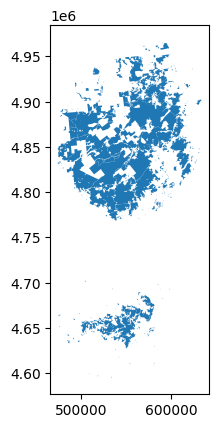

In [20]:
wild_lands.plot()

<Axes: >

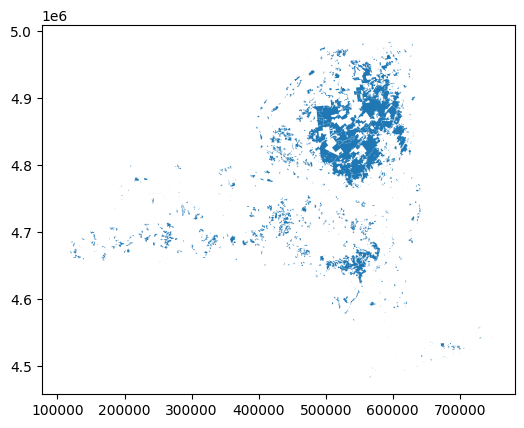

In [21]:
data.plot()

<Axes: >

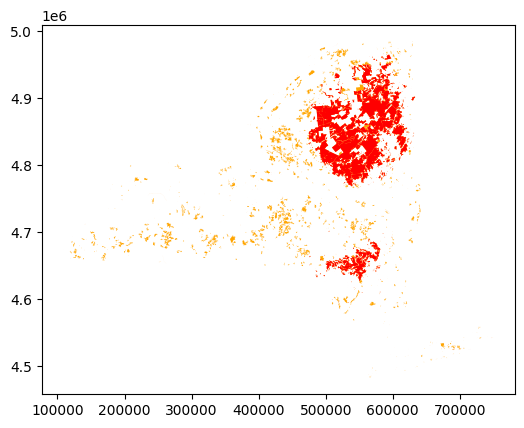

In [27]:
fig, ax = plt.subplots()
data.plot(ax = ax, color='orange')
wild_lands.plot(ax=ax, color='red')

Now we will three more GeoDataFrames, containing compsite locations (Point), foot trails (LineString) and county boundaries (Polygon).

In [28]:
location_file_path = "Decptsofinterest.shp"
foot_trails_file_path  = "Decroadstrails.shp"
counties_file_path = "NY_county_boundaries.shp"

In [29]:
# point of interest data
poi_data = gpd.read_file(location_file_path)
poi_data.head()

DataSourceError: Unable to open Decptsofinterest.shx or Decptsofinterest.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.